In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sbs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from matplotlib import pyplot

In [2]:
from google.colab import drive

drive.mount('/content/drive')
arquivo = '/content/drive/MyDrive/Colab Notebooks/MAT33 IA/DS_Agua_2017_2022.csv'

Mounted at /content/drive


In [3]:
dataset = pd.read_csv(arquivo, sep =';', encoding = 'latin1', decimal='.')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45240 entries, 1 to 45240
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DT_MEDICAO_HORA         45240 non-null  object 
 1   PRECIPITACAO            45240 non-null  float64
 2   PRESSAO_ATMOSFERICA     45240 non-null  float64
 3   TEMPERATURA_DO_AR_C     45240 non-null  float64
 4   UMIDADE_RELATIVA_DO_AR  45240 non-null  float64
 5   VELOCIDADE_VENTO        45240 non-null  float64
 6   VL_MEDICAO              45240 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [5]:
#verifica se existe variáveis nulas 
dataset.isna().sum()

DT_MEDICAO_HORA           0
PRECIPITACAO              0
PRESSAO_ATMOSFERICA       0
TEMPERATURA_DO_AR_C       0
UMIDADE_RELATIVA_DO_AR    0
VELOCIDADE_VENTO          0
VL_MEDICAO                0
dtype: int64

In [6]:
dataset.head(10)

,DT_MEDICAO_HORA,PRECIPITACAO,PRESSAO_ATMOSFERICA,TEMPERATURA_DO_AR_C,UMIDADE_RELATIVA_DO_AR,VELOCIDADE_VENTO,VL_MEDICAO
1,2017-01-01 00:00:00,0.0,1009.5,25.9,75.0,1.3,5016.845991
2,2017-01-01 01:00:00,0.0,1009.6,25.7,76.0,0.9,4998.296902
3,2017-01-01 02:00:00,0.0,1009.2,25.6,76.0,1.1,5013.330096
4,2017-01-01 03:00:00,0.0,1008.4,25.9,77.0,1.7,4972.739746
5,2017-01-01 04:00:00,0.0,1008.1,23.7,85.0,1.7,4921.942265
6,2017-01-01 05:00:00,0.2,1007.5,23.7,87.0,0.4,4838.136258
7,2017-01-01 06:00:00,0.0,1007.3,24.2,88.0,0.5,4833.215005
8,2017-01-01 07:00:00,0.0,1007.3,24.2,87.0,0.7,4795.247653
9,2017-01-01 08:00:00,0.0,1007.7,24.7,85.0,1.0,4763.098501
10,2017-01-01 09:00:00,0.0,1008.5,25.1,83.0,1.2,4715.598748


In [7]:
#tratando o dataframe
df = pd.DataFrame()
df['VL_MEDICAO']=dataset['VL_MEDICAO']

#transformação da série => janela deslizande com 1 passo de tempo
n=1
df['vl-n']=dataset['VL_MEDICAO'].shift(n)
df['tp-n']=dataset['TEMPERATURA_DO_AR_C']
df['pr-n']=dataset['PRESSAO_ATMOSFERICA']
df['vv-n']=dataset['VELOCIDADE_VENTO']
df['ur-n']=dataset['UMIDADE_RELATIVA_DO_AR']
df['ch-n']=dataset['PRECIPITACAO']

df.dropna(inplace=True)
df.head(15)

,VL_MEDICAO,vl-n,tp-n,pr-n,vv-n,ur-n,ch-n
2,4998.296902,5016.845991,25.7,1009.6,0.9,76.0,0.0
3,5013.330096,4998.296902,25.6,1009.2,1.1,76.0,0.0
4,4972.739746,5013.330096,25.9,1008.4,1.7,77.0,0.0
5,4921.942265,4972.739746,23.7,1008.1,1.7,85.0,0.0
6,4838.136258,4921.942265,23.7,1007.5,0.4,87.0,0.2
7,4833.215005,4838.136258,24.2,1007.3,0.5,88.0,0.0
8,4795.247653,4833.215005,24.2,1007.3,0.7,87.0,0.0
9,4763.098501,4795.247653,24.7,1007.7,1.0,85.0,0.0
10,4715.598748,4763.098501,25.1,1008.5,1.2,83.0,0.0
11,4712.059896,4715.598748,26.2,1009.0,1.5,77.0,0.0


In [8]:
#Cria os vetores de X e y para terinamento e teste
vl_medicoes = df.iloc[:,0].values

X = df.iloc[0:dataset.shape[0],1:7]

#Definindo os datasets de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, vl_medicoes, test_size=0.1, random_state= 1)


In [9]:

#Do total de 45239 linhas, foram separadas 75% para treinamento e 25% para teste
nlinhas = 33929 # 75% do dataset
X_train = df.iloc[0:nlinhas,1:7]
X_test = df.iloc[nlinhas:X.shape[0],1:7]

y_train = df.iloc[0:nlinhas,0].values
y_test = df.iloc[nlinhas:X.shape[0],0].values


In [10]:
#Cria a SVR de Regressão
modelo  = SVR(kernel='rbf')

In [11]:
from sklearn.model_selection import TimeSeriesSplit
# Validados cruzado para séries temporais para 5 conjuntos de dados
ts_cv = TimeSeriesSplit(
    n_splits=5, # Número de divisões 
    max_train_size=6785,    # tamanho máximo de cada conj. de treinamento
    gap=2, # número de amostras a serem excluídas entre cada conjunto de treinamento e o conjunto de teste
    test_size=2261, # tamanho máximo de cada conj. de teste.
)
scores = cross_val_score(modelo, X_train, y_train, cv=ts_cv)
#Acuracia do modelo
print(scores)
#média encontrada no cross validation
np.mean(scores)

[ 0.01856767 -0.88479936 -0.36703083 -0.24971847  0.00248151]


-0.29609989593461333

In [12]:
#treinando o modelo
modelo.fit(X_train, y_train)

SVR()

In [13]:

modelo.score(X_test, y_test)


0.6616107631514958

In [14]:
#fazendo predição
predict=modelo.predict(X_test)
predict

array([8299.95608693, 8310.84204524, 8365.08273115, ..., 8435.46251611,
       8679.69906825, 8674.76121731])

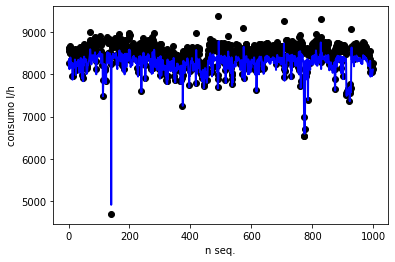

In [15]:
#O gráfico abaixo mostra os valores reais em preto e os valores prditos em azul, comprovando o overfiting do modelo
npredicts=1000
pyplot.scatter(np.arange(0,y_test.shape[0],1)[0:npredicts],np.array(y_test)[0:npredicts], color = 'black')
pyplot.plot(np.arange(0,y_test.shape[0],1)[0:npredicts], np.array(predict)[0:npredicts], color = 'blue', linewidth=2)
pyplot.xlabel('n seq.')
pyplot.ylabel('consumo l/h')
pyplot.show()

In [16]:
#Validação dos resultados

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

#Erro médio quadrático  (diferença quadrática média entre os valores estimados e valores reais) - MSE
mean_squared_error(y_test, predict)


340968.5954634147

In [17]:
#Raiz quadrada do Erro médio - RMSE
np.sqrt(mean_squared_error(y_test, predict))


583.9251625537426

In [18]:
#Distância absoluta média ou Erro médio absoluto - MAE
median_absolute_error(y_pred=predict, y_true = y_test)


199.4057332644229

In [19]:
#Calcular o MAPE (Erro médio percentual absoluto)
MAPE = ((np.mean(np.abs(y_test -predict) / (y_test)))) * 100
MAPE

4.107370671055526